In [1]:
from cnn import CNN_

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
batch_size = 64
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
train_dataset = datasets.FashionMNIST(root='../data_mnist', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='../data_mnist', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
model = CNN_().to(device)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Ewaluacja na zbiorze testowym
    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)

    test_loss /= len(test_loader)
    test_acc = correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")


Epoch 1/10 | Train Loss: 0.5194 | Train Acc: 0.8100 | Test Loss: 0.4161 | Test Acc: 0.8427
Epoch 2/10 | Train Loss: 0.3436 | Train Acc: 0.8751 | Test Loss: 0.3345 | Test Acc: 0.8792
Epoch 3/10 | Train Loss: 0.2959 | Train Acc: 0.8909 | Test Loss: 0.2920 | Test Acc: 0.8948
Epoch 4/10 | Train Loss: 0.2674 | Train Acc: 0.9002 | Test Loss: 0.2734 | Test Acc: 0.9002
Epoch 5/10 | Train Loss: 0.2466 | Train Acc: 0.9089 | Test Loss: 0.2660 | Test Acc: 0.9009
Epoch 6/10 | Train Loss: 0.2300 | Train Acc: 0.9144 | Test Loss: 0.2569 | Test Acc: 0.9045
Epoch 7/10 | Train Loss: 0.2174 | Train Acc: 0.9191 | Test Loss: 0.2549 | Test Acc: 0.9056
Epoch 8/10 | Train Loss: 0.2035 | Train Acc: 0.9246 | Test Loss: 0.2487 | Test Acc: 0.9099
Epoch 9/10 | Train Loss: 0.1965 | Train Acc: 0.9266 | Test Loss: 0.2567 | Test Acc: 0.9072
Epoch 10/10 | Train Loss: 0.1851 | Train Acc: 0.9298 | Test Loss: 0.2402 | Test Acc: 0.9131


In [16]:
from datetime import datetime

now = datetime.now()
timestamp = now.strftime("%Y-%m-%d_%H:%M:%S")

In [17]:
from pathlib import Path
name = "CNN_"+timestamp+".pth"
path_1 = "./weights/"
path_2 = path_1 + name
Path(path_1).mkdir(parents=True, exist_ok=True)
torch.save(model.state_dict(), path_2)

In [18]:
path = "./results/CNN_"+timestamp
Path(path).mkdir(parents=True, exist_ok=True)

In [19]:
history = {
    'loss': train_losses,
    'val_loss': test_losses,
    'train_acc': train_accuracies,
    'val_acc': test_accuracies
}

In [20]:
import pickle

with open(path + "/history.pickle", 'wb') as f:
    pickle.dump(history, f)

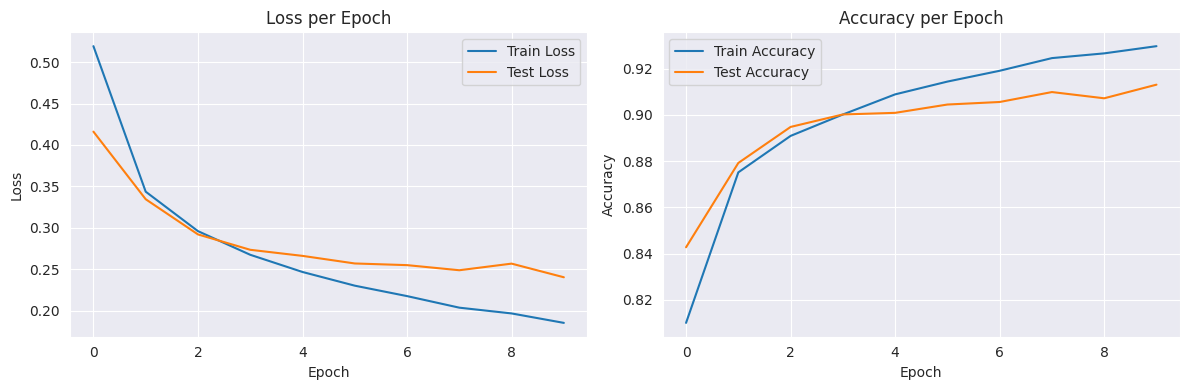

In [8]:
import matplotlib.pyplot as plt

# Wykres strat
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
import numpy as np
import random

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

model.eval()

CNN_(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (dropout): Dropout(p=0.3, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

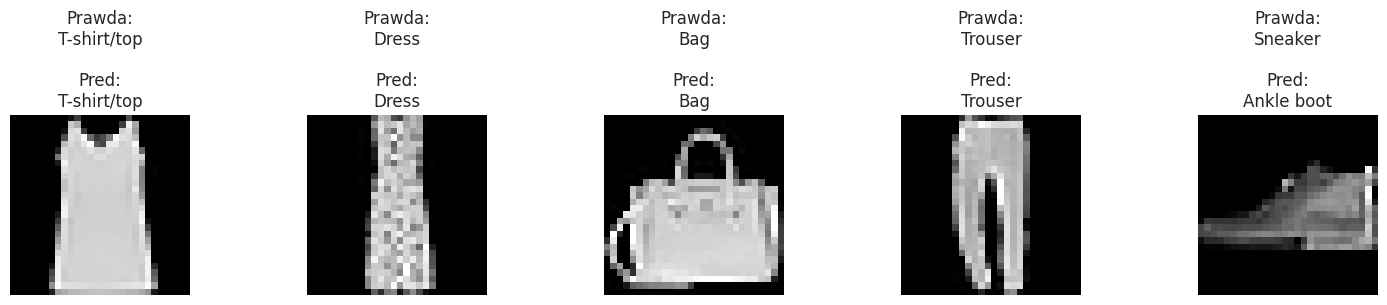

In [10]:
indices = random.sample(range(len(test_dataset)), 5)
# Tworzenie wykresu
plt.figure(figsize=(15, 3))

for i, idx in enumerate(indices):
    image, label = test_dataset[idx]
    input_image = image.unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_image)
        pred = output.argmax(dim=1).item()

    # Rysowanie obrazka
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Prawda:\n{class_names[label]}\n\nPred:\n{class_names[pred]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns

In [12]:
import numpy as np

model.eval()

all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)

        preds = outputs.argmax(dim=1) #  best prediction
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Konwersja do numpy
all_preds = np.array(all_preds) # predykcje
all_labels = np.array(all_labels) # prawdziwe etykiety
all_probs = np.array(all_probs) # prawdopodobieństwa

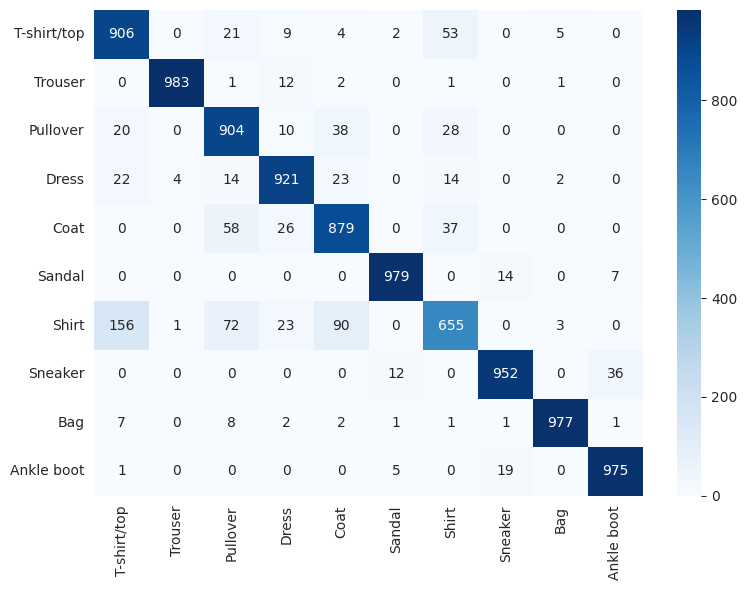

In [13]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.tight_layout()
plt.savefig('CNN_matrix.png', dpi=300)

plt.show()


In [14]:
acc = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9131


In [15]:
from sklearn.preprocessing import label_binarize

labels_bin = label_binarize(all_labels, classes=range(10)) # binarization for ROC AUC

roc_auc = roc_auc_score(labels_bin, all_probs, average=None) #

for i, auc_val in enumerate(roc_auc):
    print(f"ROC AUC dla klasy {class_names[i]}: {auc_val:.4f}")

ROC AUC dla klasy T-shirt/top: 0.9923
ROC AUC dla klasy Trouser: 0.9998
ROC AUC dla klasy Pullover: 0.9921
ROC AUC dla klasy Dress: 0.9968
ROC AUC dla klasy Coat: 0.9921
ROC AUC dla klasy Sandal: 0.9997
ROC AUC dla klasy Shirt: 0.9766
ROC AUC dla klasy Sneaker: 0.9991
ROC AUC dla klasy Bag: 0.9995
ROC AUC dla klasy Ankle boot: 0.9994
